# Ball speed estimation

## 1. Get 2D trajectory of test videos

As explained in the paper, for speed estimation we ran the ball detection on videos cut to 20 frames, starting with the ball release frame. The videos are downloaded from this database: http://ze-video.mlb.com/video/mlbam/2016/10/01/umpeval/video/449253/

The output is saved in a json file for each play (containing the outputs of all three cameras)

In the following, firstly functions to download the data, and then the script to run ball detection for multiple videos can be found

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
import matplotlib
import json
import cv2
print(cv2.__version__)
import os

3.1.0


In [2]:
# Load ball_detection code from the parent directory (because it is used for object detection and event detection)
import sys
sys.path.append("..")
from fmo_detection import detect_ball, plot_trajectory, plot_trajectory_on_video

/Users/ninawiedemann/anaconda/envs/baseball_analysis3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Specify path to download and load videos

In [3]:
PATH = os.path.join("..", "train_data", "short_ball_speed_videos") # 
# PATH = "/Volumes/Nina Backup/PITCHfx video"
OUT_PATH= os.path.join("ball_speed_from_2D","449253")

## 1.1 Download data

In [10]:
import urllib
import urllib.request

import re
import os 

if not os.path.exists(PATH):
    os.makedirs(PATH)

url = "http://ze-video.mlb.com/video/mlbam/2016/10/01/umpeval/video/449253/" # change here for other videos (other game)

urllist = re.findall(r"""<\s*a\s*href=["']([^=]+)["']""", urllib.request.urlopen(url).read().decode("utf-8"))


print("start downloading")
for i in urllist[1:3]: # CHANGE HERE TO DOWNLOAD MORE VIDEOS (leave 1:)
    new_dir = os.path.join(PATH, str(i)[-7:-1])
    print(new_dir)
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    else:
        continue
    
    for camera in ["a","b","c"]:
        path = os.path.join(PATH, str(i)[-7:-1], "camera_"+camera+".mp4")
        in_path = os.path.join(url,i,"camera_"+camera+".mp4")
        print(path, in_path)
        urllib.request.urlretrieve(in_path, path)
print("finished downloading")

start downloading
/Volumes/Nina Backup/PITCHfx video/190837
/Volumes/Nina Backup/PITCHfx video/190849
finished downloading


## 1.2 Run ball detection on all downloaded videos

------------- VIDEOS OF PLAY 222328 ----------------------

 CAMERA  a  with path  /Volumes/Nina Backup/PITCHfx video/222328/camera_a.mp4 

Ball Trajectory [[166.0, 205.5, 0.0], [210.5, 219.0, 1.0], [256.0, 232.0, 2.0], [299.5, 246.0, 3.0], [348.0, 261.0, 4.0], [395.5, 275.5, 5.0], [443.0, 291.5, 6.0], [490.0, 307.5, 7.0], [540.0, 324.0, 8.0], [588.0, 340.5, 9.0]]


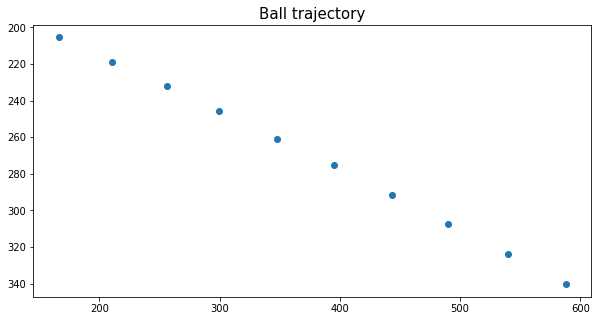


 CAMERA  b  with path  /Volumes/Nina Backup/PITCHfx video/222328/camera_b.mp4 

Ball Trajectory [[548.5, 256.0, 0.0], [505.0, 266.0, 1.0], [460.5, 276.5, 2.0], [419.0, 287.5, 3.0], [372.0, 300.0, 4.0], [328.5, 310.0, 5.0], [279.5, 323.0, 6.0], [232.0, 336.5, 7.0], [183.5, 350.0, 8.0]]


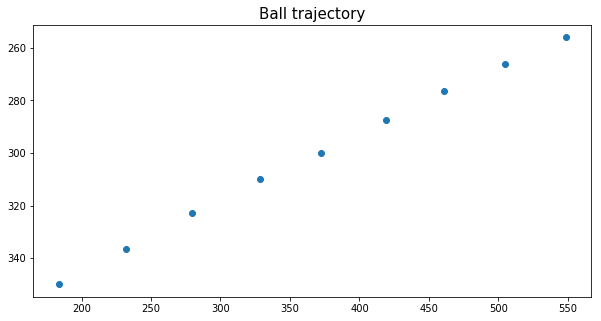


 CAMERA  c  with path  /Volumes/Nina Backup/PITCHfx video/222328/camera_c.mp4 

Ball Trajectory [[266.5, 274.5, 0.0], [290.5, 269.0, 1.0], [319.0, 265.0, 2.0]]


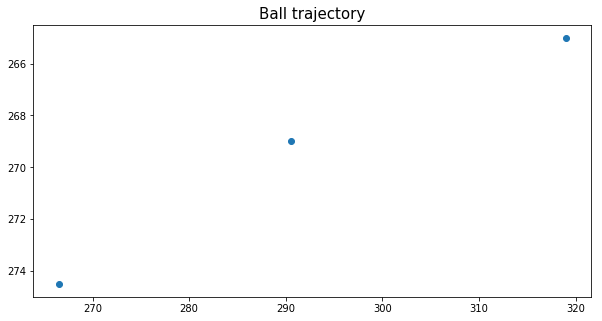

------------- VIDEOS OF PLAY 205738 ----------------------

 CAMERA  a  with path  /Volumes/Nina Backup/PITCHfx video/205738/camera_a.mp4 

Ball Trajectory [[171.5, 199.5, 0.0], [212.0, 213.0, 1.0], [256.0, 225.0, 2.0], [300.0, 238.5, 3.0], [342.5, 252.0, 4.0], [388.0, 264.5, 5.0], [434.0, 280.5, 6.0], [479.0, 294.5, 7.0], [526.0, 309.0, 8.0], [572.0, 325.0, 9.0], [620.0, 343.0, 10.0], [668.0, 360.5, 11.0]]


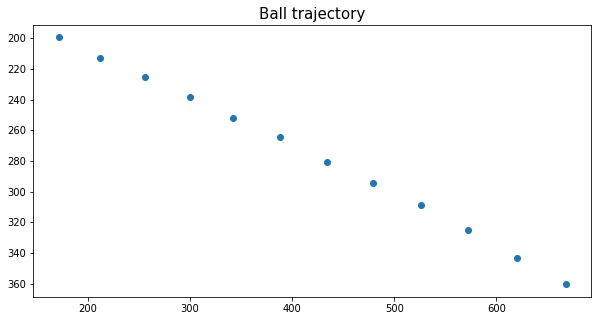


 CAMERA  b  with path  /Volumes/Nina Backup/PITCHfx video/205738/camera_b.mp4 

Ball Trajectory [[584.0, 248.0, 0.0], [540.0, 256.5, 1.0], [494.5, 265.0, 2.0], [404.0, 284.5, 4.0], [356.0, 292.5, 5.0], [309.0, 302.5, 6.0], [260.0, 312.5, 7.0], [212.0, 323.0, 8.0], [161.0, 334.0, 9.0]]


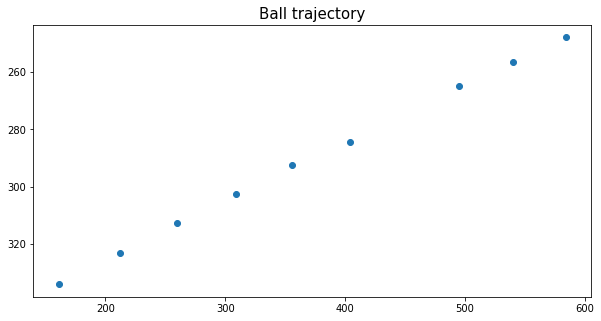


 CAMERA  c  with path  /Volumes/Nina Backup/PITCHfx video/205738/camera_c.mp4 

Ball Trajectory [[319.0, 246.0, 2.0], [322.5, 298.5, 3.0], [310.0, 349.5, 4.0]]


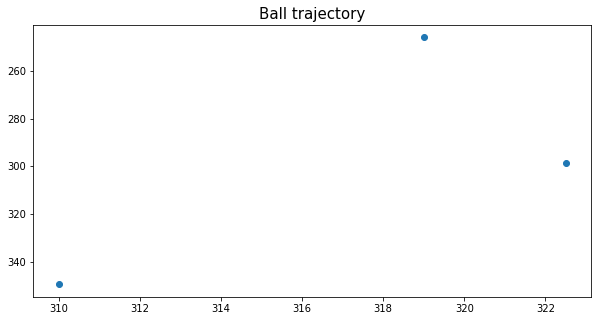

------------- VIDEOS OF PLAY 203609 ----------------------

 CAMERA  a  with path  /Volumes/Nina Backup/PITCHfx video/203609/camera_a.mp4 



KeyboardInterrupt: 

In [4]:
# 1: /video/mlbam/2016/10/01/umpeval/video/449267/160930_193828
# 2: 449253/160930_190849
# PITCHfx video

dire = os.listdir(PATH)
counter = 0
for fi in dire: # 210642
    if len(fi)!=6:
        continue
    #with open(path+fi+".json", "r") as infile:
     #       dic1 = json.load(infile)
    print("------------- VIDEOS OF PLAY", fi, "----------------------")
    dic = {}
    dic["link"] = "http://ze-video.mlb.com/video/mlbam/2016/10/01/umpeval/video/449253/160930_"+fi
        
    for camera in ["a", "b", "c"]:
        
        BASE = os.path.join(PATH, fi, "camera_"+camera+".mp4")
        print("\n CAMERA ", camera, " with path ", BASE, "\n")
        ball_trajectory, _, _ = detect_ball(BASE, joints_array = None, plotting=False, min_area=20) #400
        if len(ball_trajectory)==0:
            dic["camera_"+camera]={}
            print("NO DETECTION FOR", fi, camera)
            counter+=1
        else:
            print("Ball Trajectory", ball_trajectory.tolist())
            plot_trajectory(ball_trajectory)
            inner_dic = {}
            for ball in ball_trajectory:
                inner_dic["frame "+str(ball[2])] = {"x":ball[0], "y": ball[1]}
            dic["camera_"+camera] = inner_dic
            
    with open(os.path.join(OUT_PATH, fi+".json"), "w") as outfile:
        json.dump(dic, outfile)
        
print("videos in which no ball was detected:", counter)

## 1.3 Test output and plot on video:

###  Load json file, and plot circles around the ball locations on the video - outputs a video that is saved in the corresponding folder

In [5]:
dire = os.listdir(OUT_PATH)
for fi in dire: # restrict if not a video for each folder is wished
    if len(fi[:-5])!=6:
        continue
    with open(os.path.join(PATH,fi), "r") as infile:
        dic = json.load(infile)
    print("From link", dic["link"])
    for camera in ["a","b", "c"]:
        dic2 = dic["camera_"+camera]
        ball_trajectory = []
        for key in sorted(dic2):
            ball_trajectory.append([dic2[key]["x"], dic2[key]["y"], int(float(key[-4:]))])
        ball_trajectory = np.array(ball_trajectory)
        ball_trajectory = ball_trajectory[np.argsort(ball_trajectory[:,2])]
        print(ball_trajectory.tolist())
        # trajectory_and_speed(ball_trajectory)
        BASE = os.path.join(PATH, fi[:-5], "camera_"+camera+".mp4")
        output_path = os.path.join(OUT_PATH, fi[:-5]+"ball_camera_"+camera+".avi")
        
        # Plot output on video and save
        plot_trajectory_on_video(BASE, output_path, ball_trajectory)

From link http://ze-video.mlb.com/video/mlbam/2016/10/01/umpeval/video/449253/160930_210337
[[176.5, 205.5, 2.0], [220.0, 218.5, 3.0], [266.0, 231.5, 4.0], [311.0, 242.5, 5.0], [356.0, 257.0, 6.0], [403.0, 271.5, 7.0], [448.0, 284.5, 8.0], [495.0, 300.0, 9.0], [543.0, 314.5, 10.0], [589.5, 331.0, 11.0], [640.0, 343.5, 12.0]]
[[555.0, 252.5, 2.0], [512.5, 261.0, 3.0], [468.0, 269.5, 4.0], [426.5, 280.0, 5.0], [380.5, 288.5, 6.0], [336.5, 300.0, 7.0], [291.0, 309.5, 8.0], [244.0, 320.5, 9.0], [196.5, 332.0, 10.0], [148.0, 343.5, 11.0]]
[[317.0, 267.0, 6.0], [343.0, 238.0, 7.0], [365.5, 215.0, 8.0], [368.5, 299.5, 13.0], [375.5, 290.5, 14.0], [381.0, 281.5, 15.0]]


KeyboardInterrupt: 

# 2. Evaluation of ball speed estimation results

The ball is detected and the trajectories are saved as json files in the cells above. The 2D coordinates are transformed to 3D and speed is estimated with linear regression. The code for that part is not available here, because it is run by other members of the team at NYU specialized on the 3D representations.

Here, the results of this estimation are evaluated. The results for 337 videos are saved in reports in the outputs-folder. The camera can be specified in the next cell.

In [18]:
camera = "a" # or b (camera c is too instable and was not used for speed estimation)

csv = pd.read_csv(os.path.join(OUT_PATH, "449253_camera_a_report.csv"), delimiter=";") # speed2
print(csv.columns.tolist())

['sportvision_pitch_id', 'sportvision_speed_at_50_feet', 'linear_regression_start_speed', 'linear_regression_error', 's0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 'Unnamed: 14']


## Extract columns and delete missing rows (not error in our results, but videos not available)

In [19]:
labels = csv["sportvision_speed_at_50_feet"].values
print("number of videos", labels.shape)
out = csv["linear_regression_start_speed"].values
col = csv['sportvision_pitch_id'].values
nr_videos = len(out)
inds = np.where(np.isnan(out))
missing = len(inds[0])
print("Number of missing data (no video available for this camera)", missing)
labels = np.delete(labels, inds)
out = np.delete(out, inds)
col = np.delete(col, inds)
print("shape speed outputs", out.shape, "shape labels outputs", labels.shape)
print("maximum speed", np.amax(out), "minimum speed", np.amin(out))

number of videos (337,)
Number of missing data (no video available for this camera) 6
shape speed outputs (331,) shape labels outputs (331,)
maximum speed 96.7111 minimum speed 70.1945


In [11]:
assert(len(labels)==len(out))
assert(len(col)==len(out))

## Evaluation in histogram

Before that, delete far outliers (just one for each camera) where ball detection did not work properly

excluded data point because unrealistic output (error >8) 1
mean label speed 87.7870090634
mean our speed 85.5601072508
mean deviation 2.26871030303
mean error 2.52831030303


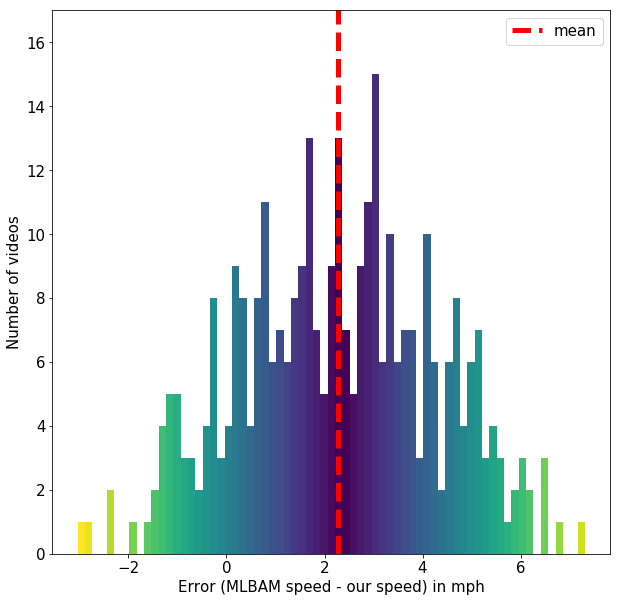

In [12]:
deviation = labels-out
error = np.absolute(deviation)
deviation = deviation[np.where(error<8)]
error = error[np.where(error<8)]
print("excluded data point because unrealistic output (error >8)", len(np.where(error<8)))
binwidth = 0.15
print("mean label speed", np.mean(labels))
print("mean our speed", np.mean(out))
print("mean deviation", np.mean(deviation))
print("mean error", np.mean(error))
plt.figure(figsize=(10,10))
N, bins, patches = plt.hist(deviation, bins=np.arange(min(deviation), max(deviation) + binwidth, binwidth))
fracs = np.absolute(bins-np.mean(deviation))  #N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
lim = int(np.amax(N))+3
plt.plot([np.mean(deviation) for _ in range(lim)], range(lim), c="red", label="mean", linewidth=5, linestyle="--")
    
plt.tick_params(axis='y', bottom='off',top='off')

plt.xlabel("Error (MLBAM speed - our speed) in mph", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of videos", fontsize=15)
plt.ylim(0,lim-1)
plt.legend(fontsize=15)
plt.show()

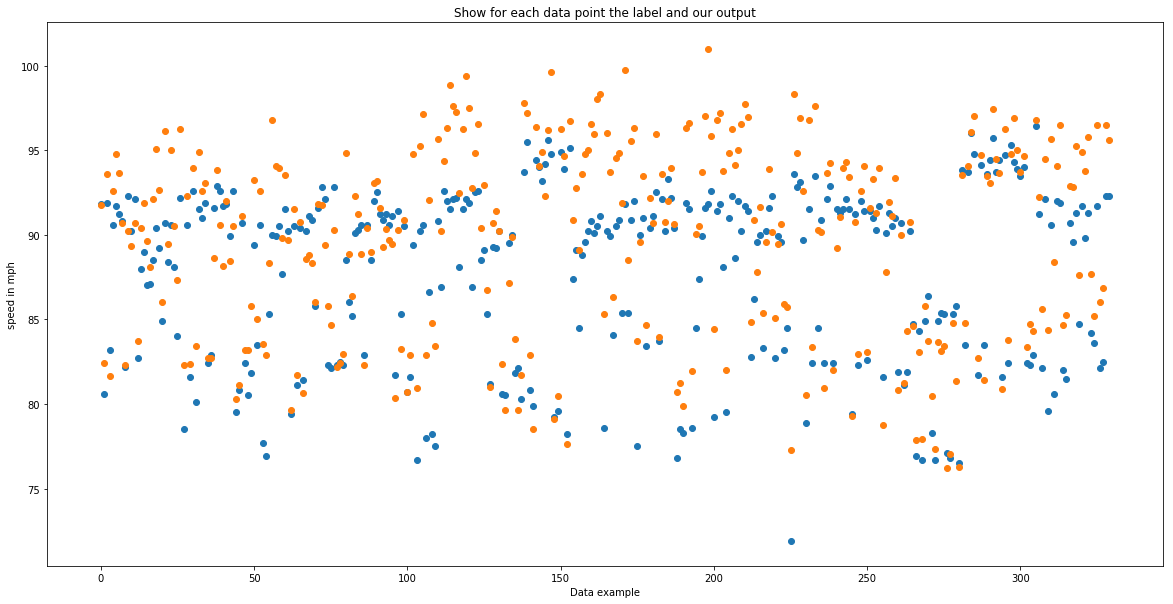

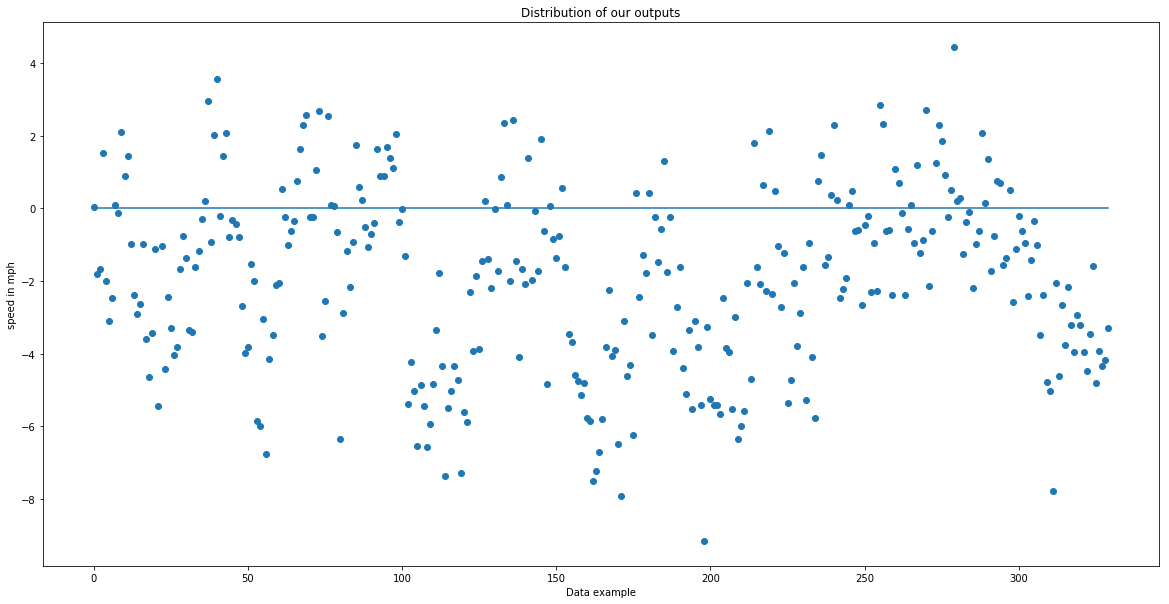

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(np.arange(len(labels)), labels)
plt.scatter(np.arange(len(out)), out)
plt.title("Show for each data point the label and our output")
plt.ylabel("speed in mph")
plt.xlabel("Data example")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(np.arange(len(labels)), labels-out)
plt.plot(np.arange(len(labels)), np.zeros(len(labels)))
plt.title("Distribution of our outputs")
plt.ylabel("speed in mph")
plt.xlabel("Data example")
plt.show()